In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fd2c06d71da0507e001ece5bc1a313a4


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | moose factory
Processing Record 2 of Set 1 | thinadhoo
Processing Record 3 of Set 1 | yelatma
Processing Record 4 of Set 1 | luderitz
Processing Record 5 of Set 1 | victoria
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | new norfolk
Processing Record 8 of Set 1 | hofn
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | kavaratti
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | geraldton
Processing Record 13 of Set 1 | castro
Processing Record 14 of Set 1 | severo-kurilsk
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | log
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | kasane
Processing Record 21 of Set 1 | esperance
Processing Record 22 of Set 1 | richard toll
City not found. Skipping...
Proces

Processing Record 36 of Set 4 | shimoda
Processing Record 37 of Set 4 | pevek
Processing Record 38 of Set 4 | paamiut
Processing Record 39 of Set 4 | palkino
Processing Record 40 of Set 4 | san policarpo
Processing Record 41 of Set 4 | salta
Processing Record 42 of Set 4 | ngukurr
City not found. Skipping...
Processing Record 43 of Set 4 | mount gambier
Processing Record 44 of Set 4 | vilhena
Processing Record 45 of Set 4 | nikolskoye
Processing Record 46 of Set 4 | jequie
Processing Record 47 of Set 4 | los llanos de aridane
Processing Record 48 of Set 4 | normandin
Processing Record 49 of Set 4 | marsaxlokk
Processing Record 50 of Set 4 | lae
Processing Record 1 of Set 5 | flinders
Processing Record 2 of Set 5 | pangnirtung
Processing Record 3 of Set 5 | mackay
Processing Record 4 of Set 5 | keti bandar
Processing Record 5 of Set 5 | lerwick
Processing Record 6 of Set 5 | gryfino
Processing Record 7 of Set 5 | xining
Processing Record 8 of Set 5 | carballo
Processing Record 9 of Set 

Processing Record 28 of Set 8 | bosobolo
Processing Record 29 of Set 8 | kargasok
Processing Record 30 of Set 8 | nemuro
Processing Record 31 of Set 8 | hihifo
City not found. Skipping...
Processing Record 32 of Set 8 | mokhsogollokh
Processing Record 33 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 34 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 35 of Set 8 | saskylakh
Processing Record 36 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 37 of Set 8 | sarangani
Processing Record 38 of Set 8 | jizan
Processing Record 39 of Set 8 | salym
Processing Record 40 of Set 8 | buala
Processing Record 41 of Set 8 | namatanai
Processing Record 42 of Set 8 | mount isa
Processing Record 43 of Set 8 | tura
Processing Record 44 of Set 8 | caravelas
Processing Record 45 of Set 8 | penzance
Processing Record 46 of Set 8 | zyryanka
Processing Record 47 of Set 8 | tommot
Processing Record 48 of Set 8 | villarrica
Processing Record 49 of Set 8 | lac du bo

Processing Record 11 of Set 12 | sampit
Processing Record 12 of Set 12 | korostyshiv
Processing Record 13 of Set 12 | chara
Processing Record 14 of Set 12 | mujiayingzi
Processing Record 15 of Set 12 | byron bay
Processing Record 16 of Set 12 | vostok
Processing Record 17 of Set 12 | touros
Processing Record 18 of Set 12 | ambilobe
Processing Record 19 of Set 12 | jutai
Processing Record 20 of Set 12 | hambantota
Processing Record 21 of Set 12 | bichura
Processing Record 22 of Set 12 | purificacion
Processing Record 23 of Set 12 | ginir
Processing Record 24 of Set 12 | baikunthpur
Processing Record 25 of Set 12 | bellary
Processing Record 26 of Set 12 | acapulco
Processing Record 27 of Set 12 | half moon bay
Processing Record 28 of Set 12 | bilma
Processing Record 29 of Set 12 | padang
Processing Record 30 of Set 12 | skjervoy
Processing Record 31 of Set 12 | southampton
Processing Record 32 of Set 12 | lannion
Processing Record 33 of Set 12 | la rioja
Processing Record 34 of Set 12 | 

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Moose Factory,51.2585,-80.6094,44.60,42,0,10.36,CA,2022-05-01 14:35:03
1,Thinadhoo,0.5333,72.9333,86.00,70,89,16.46,MV,2022-05-01 14:35:10
2,Yelatma,54.9675,41.7508,48.65,49,77,6.55,RU,2022-05-01 14:40:57
3,Luderitz,-26.6481,15.1594,72.77,39,0,10.83,NA,2022-05-01 14:38:06
4,Victoria,22.2855,114.1577,65.25,93,100,8.01,HK,2022-05-01 14:28:55
5,Punta Arenas,-53.1500,-70.9167,41.11,93,0,8.05,CL,2022-05-01 14:40:59
6,New Norfolk,-42.7826,147.0587,59.92,80,100,4.00,AU,2022-05-01 14:34:46
7,Hofn,64.2539,-15.2082,48.22,76,75,8.05,IS,2022-05-01 14:41:00
8,Bluff,-46.6000,168.3333,52.81,93,19,8.03,NZ,2022-05-01 14:41:01
9,Kavaratti,10.5669,72.6420,85.12,71,25,10.76,IN,2022-05-01 14:33:25


In [93]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

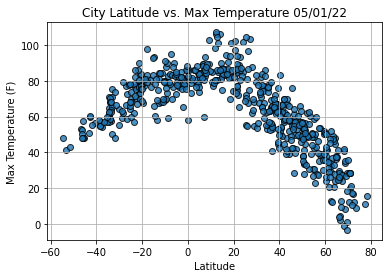

In [28]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

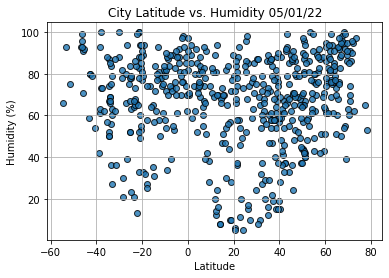

In [29]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

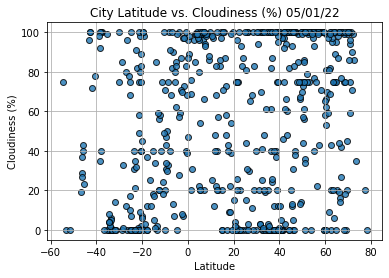

In [30]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

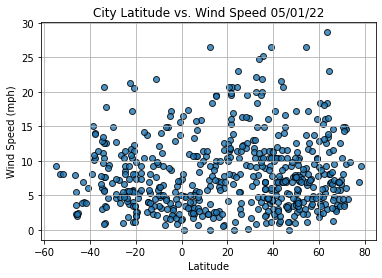

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [31]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [34]:
index13 = city_data_df.loc[13]
index13

City               Severo-Kurilsk
Lat                       50.6789
Lng                       156.125
Max Temp                    33.73
Humidity                       87
Cloudiness                     75
Wind Speed                  10.13
Country                        RU
Date          2022-05-01 14:31:42
Name: 13, dtype: object

In [37]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Moose Factory,51.2585,-80.6094,44.60,42,0,10.36,CA,2022-05-01 14:35:03
1,Thinadhoo,0.5333,72.9333,86.00,70,89,16.46,MV,2022-05-01 14:35:10
2,Yelatma,54.9675,41.7508,48.65,49,77,6.55,RU,2022-05-01 14:40:57
4,Victoria,22.2855,114.1577,65.25,93,100,8.01,HK,2022-05-01 14:28:55
7,Hofn,64.2539,-15.2082,48.22,76,75,8.05,IS,2022-05-01 14:41:00


In [38]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

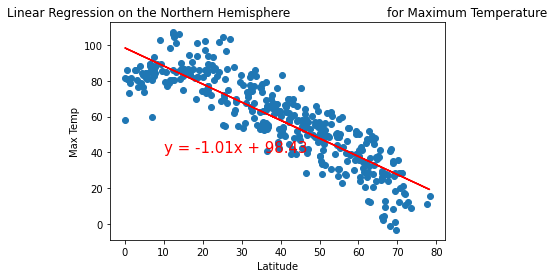

In [75]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

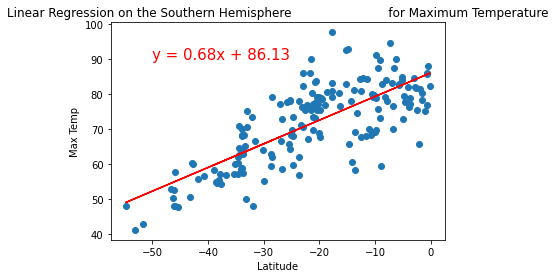

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

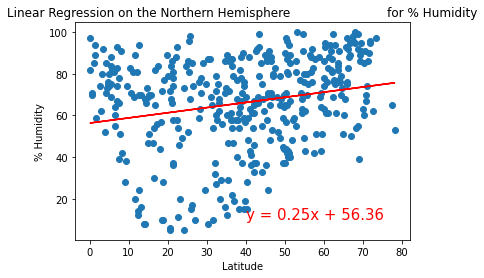

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

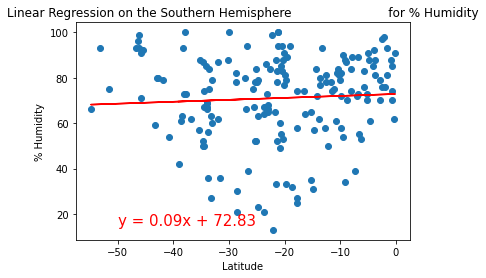

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

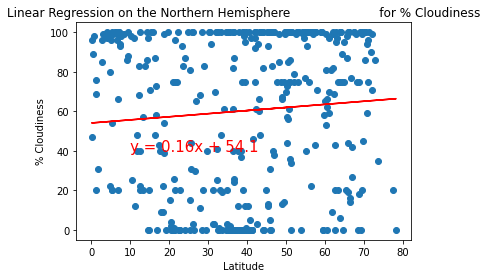

In [70]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
#Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for % Cloudiness', '% Cloudiness', (10,40))

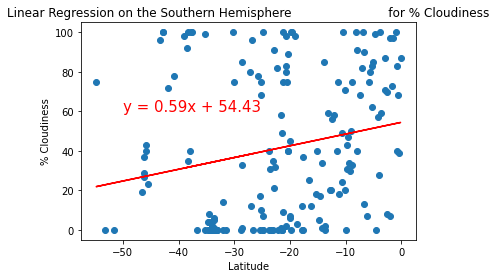

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

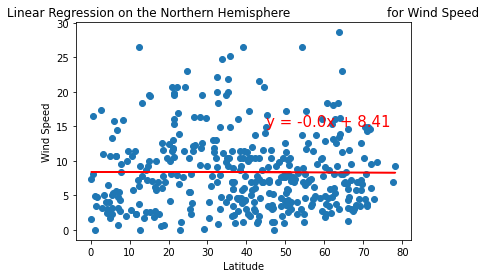

In [91]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(45,15))

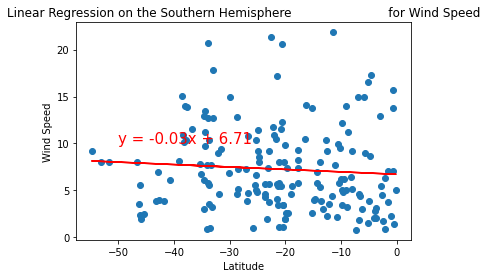

In [92]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,10))